In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/pokemon_type.csv"
df = pd.read_csv(url)
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


### accessing a column in a dataframe

In [5]:
df['Name'] # single columnn aka series (column as a key)

0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
716       Yveltal
717       Zygarde
718       Diancie
719         Hoopa
720     Volcanion
Name: Name, Length: 721, dtype: object

In [6]:
df.Type_1 # column as a property

0        Grass
1        Grass
2        Grass
3         Fire
4         Fire
        ...   
716       Dark
717     Dragon
718       Rock
719    Psychic
720       Fire
Name: Type_1, Length: 721, dtype: object

### multiple columns in a dataframe i.e its a subset of a dataframe

In [7]:
cols = ['Total','HP','Attack']
df[cols]

,Total,HP,Attack
0,318,45,49
1,405,60,62
2,525,80,82
3,309,39,52
4,405,58,64
...,...,...,...
716,680,126,131
717,600,108,100
718,600,50,100
719,600,80,110


In [8]:
df[['Name','Total']]

,Name,Total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,Charmander,309
4,Charmeleon,405
...,...,...
716,Yveltal,680
717,Zygarde,600
718,Diancie,600
719,Hoopa,600


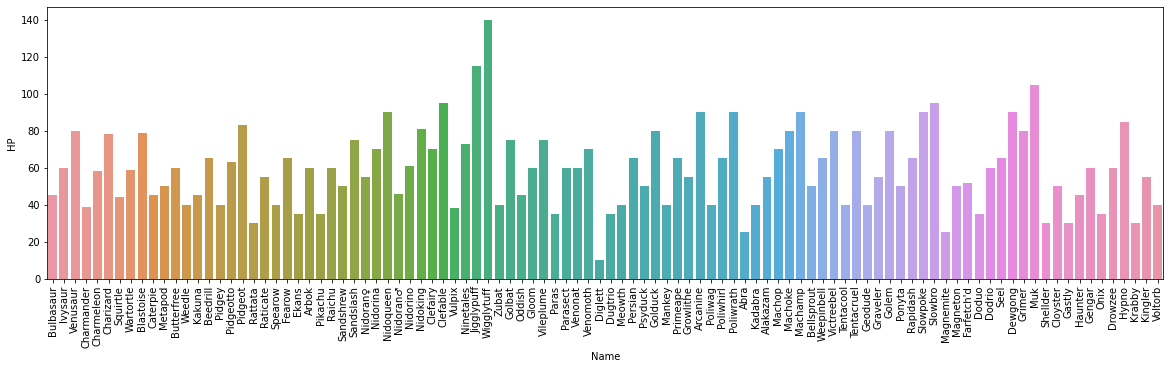

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x='Name',y='HP',data=df[:100])
plt.xticks(rotation=90)
plt.show()

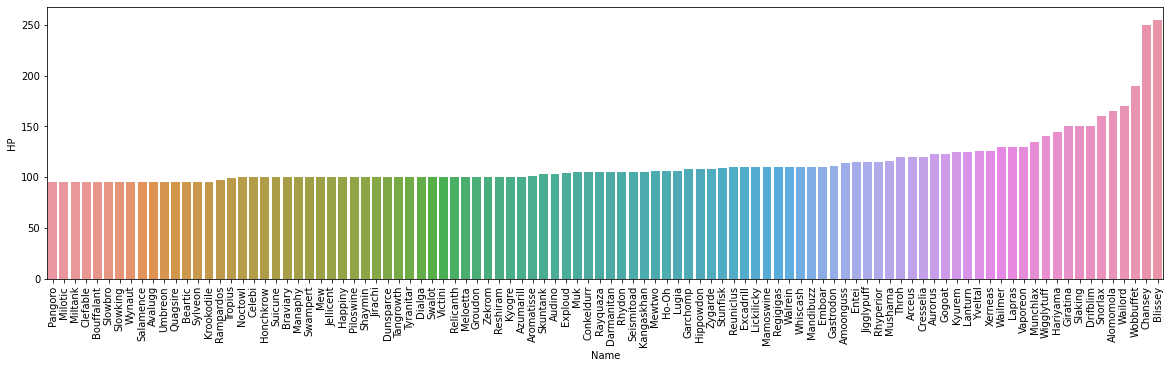

In [12]:
plt.figure(figsize=(20,5))
sns.barplot(x='Name',y='HP',data=df.sort_values('HP')[-100:])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

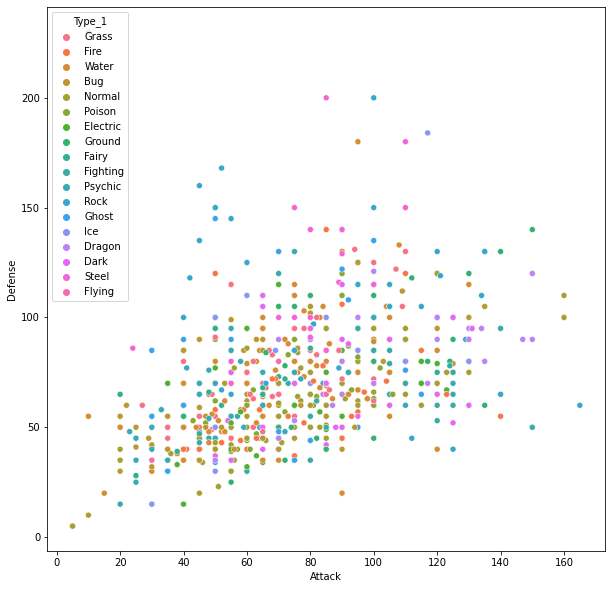

In [13]:
# to check how 2 numerical columns are related
plt.figure(figsize=(10,10))
sns.scatterplot(x='Attack',y='Defense',data=df, hue='Type_1')

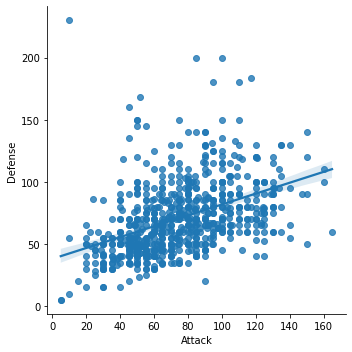

In [14]:
# to check how 2 numerical columns are related
sns.lmplot(x='Attack',y='Defense',data=df)

<AxesSubplot:xlabel='Type_1', ylabel='Attack'>

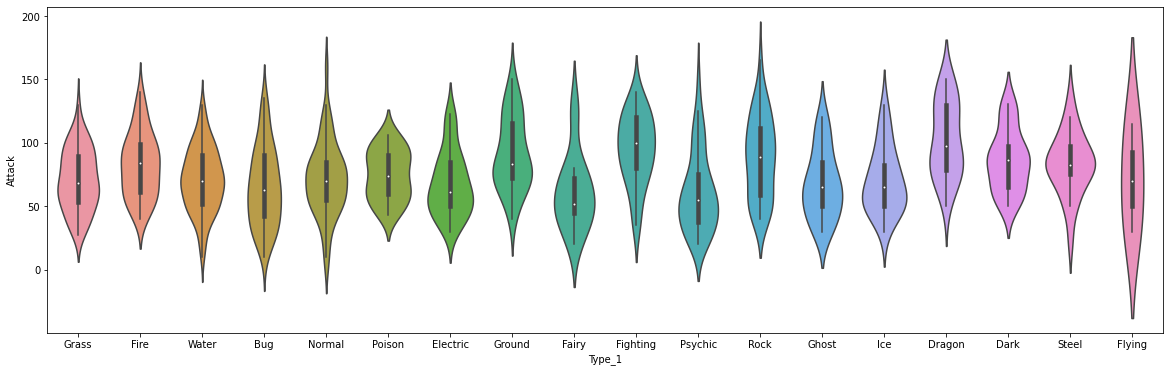

In [15]:
# to check if a categorical column is related to a numerical column
plt.figure(figsize=(20,6))
sns.violinplot(x='Type_1',y='Attack',data=df)

<AxesSubplot:xlabel='Type_1', ylabel='Attack'>

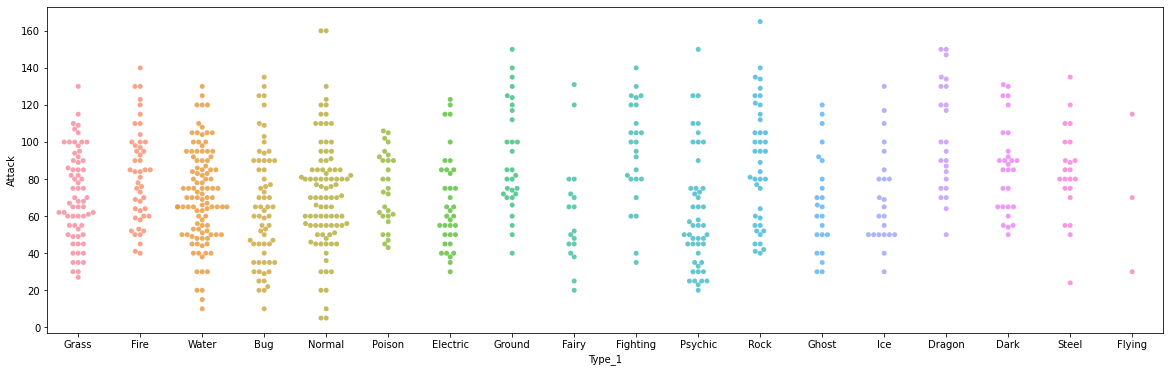

In [16]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='Type_1',y='Attack',data=df,alpha=0.8)

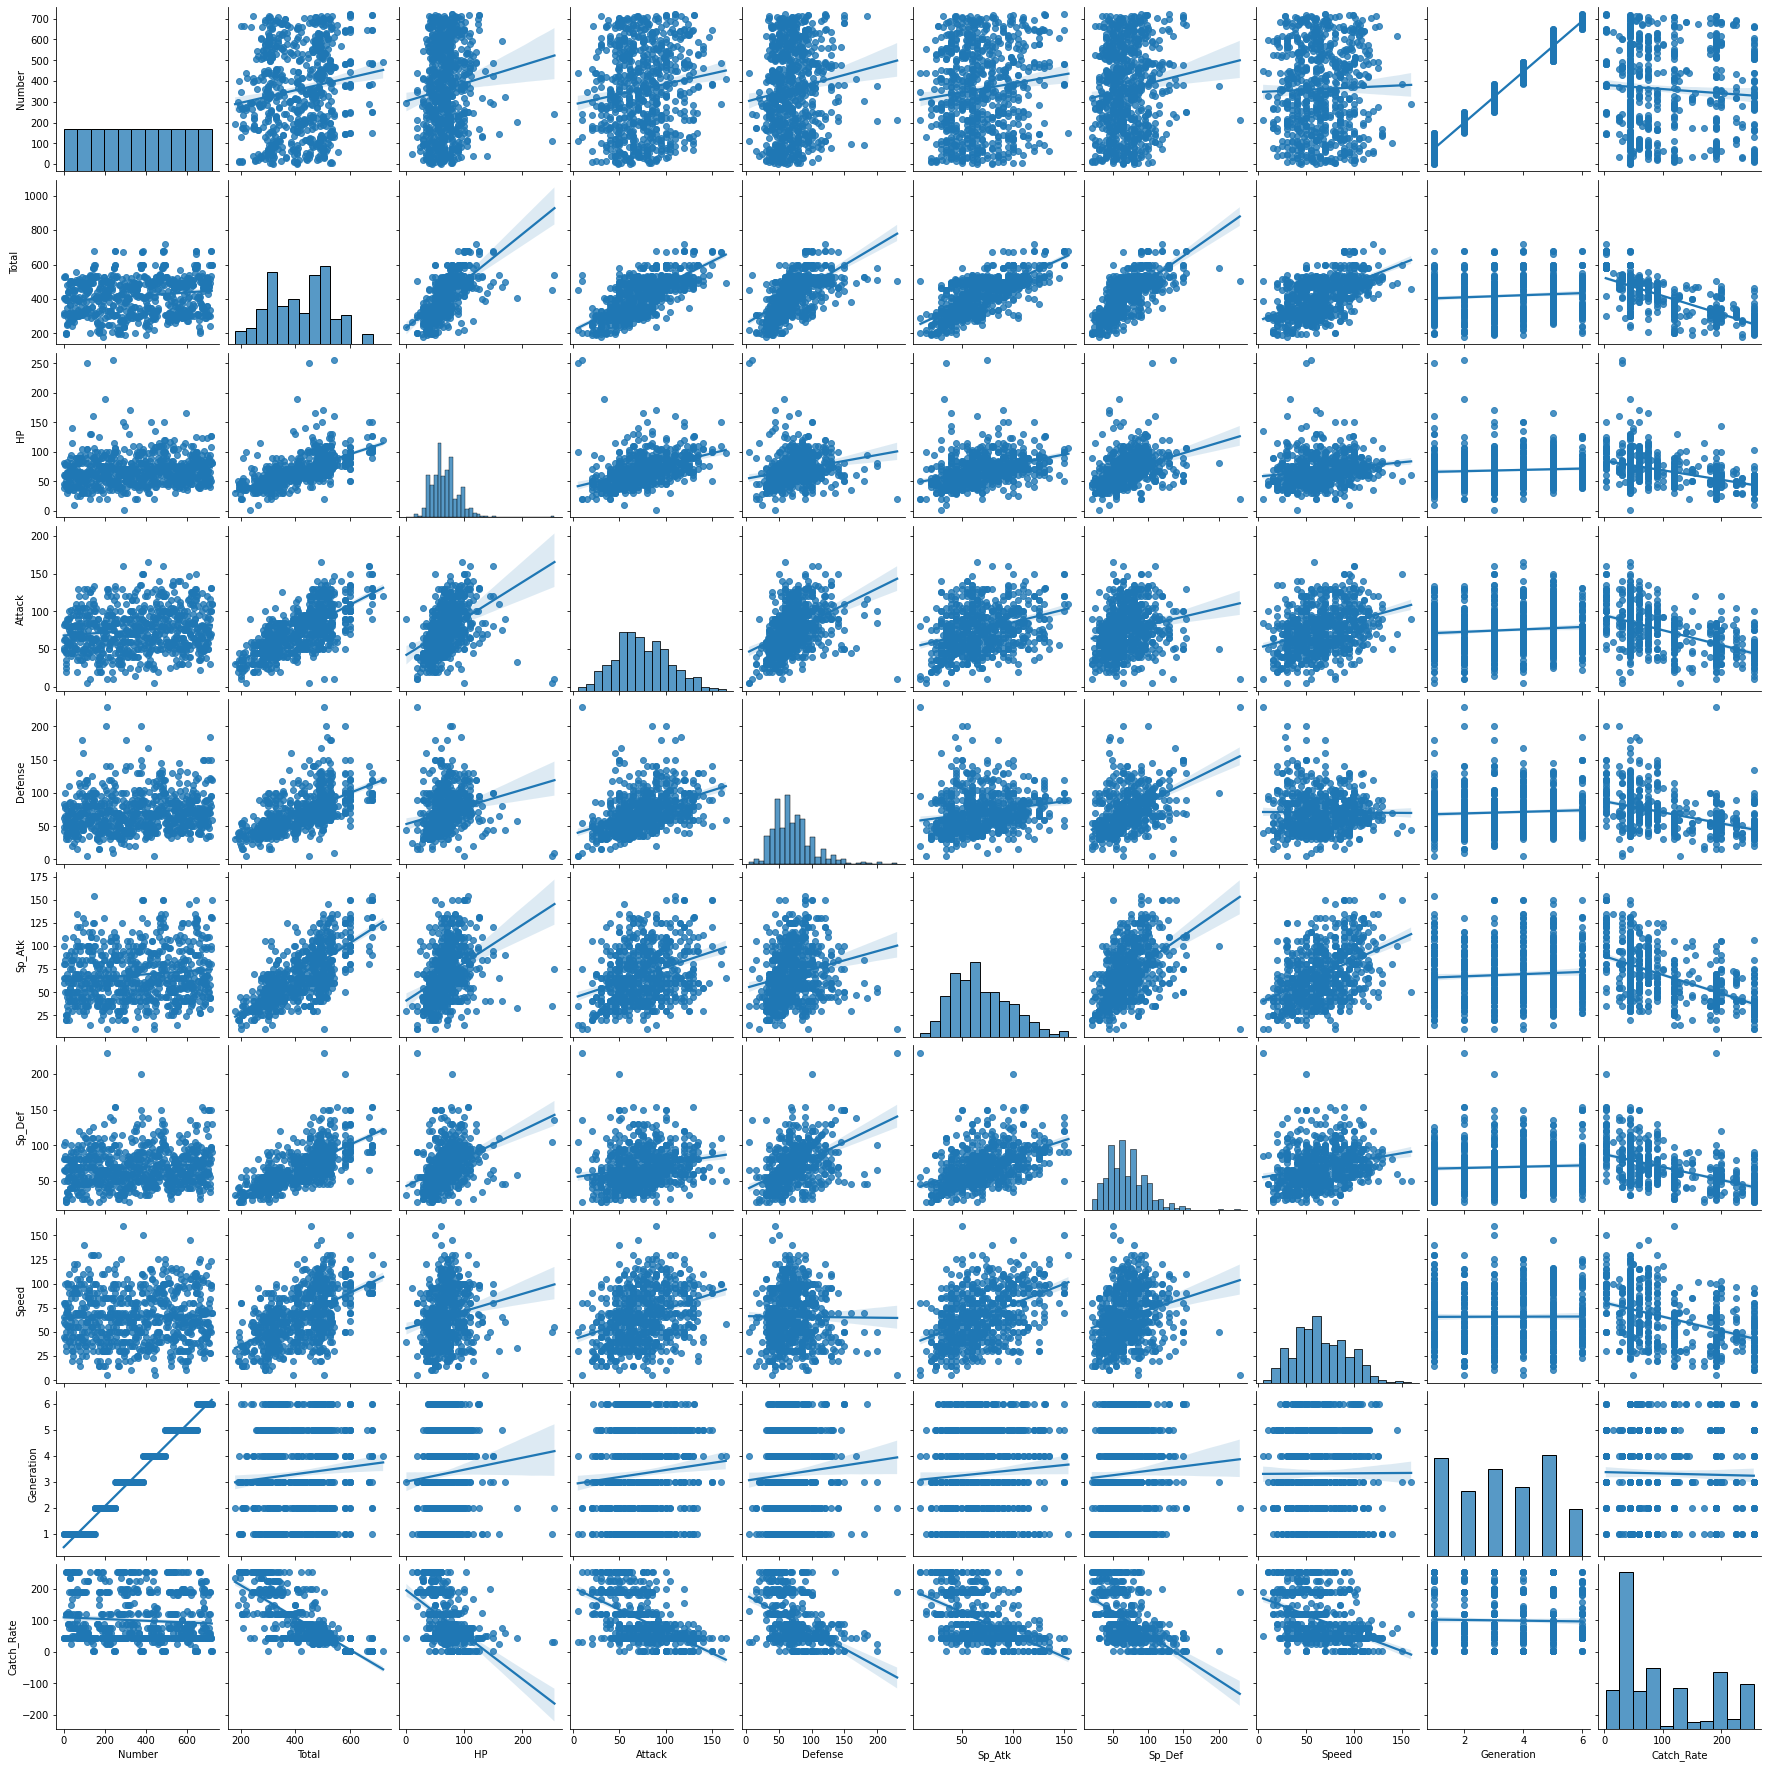

In [17]:
sns.pairplot(df.select_dtypes(include=['int']),kind='reg')

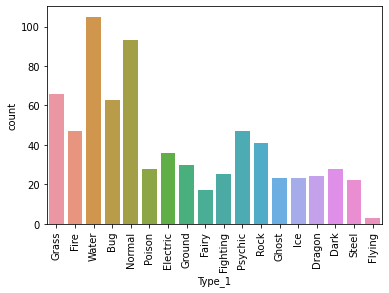

In [18]:
# visualize only categorical columns
sns.countplot(x='Type_1',data=df)
plt.xticks(rotation=90)
plt.show()

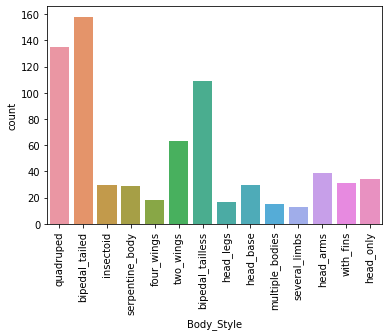

In [19]:
sns.countplot(x='Body_Style',data=df)
plt.xticks(rotation=90)
plt.show()

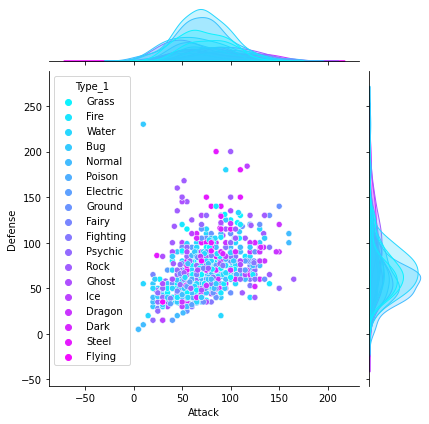

In [21]:
sns.jointplot(x='Attack',y='Defense',data=df,palette='cool',hue='Type_1')

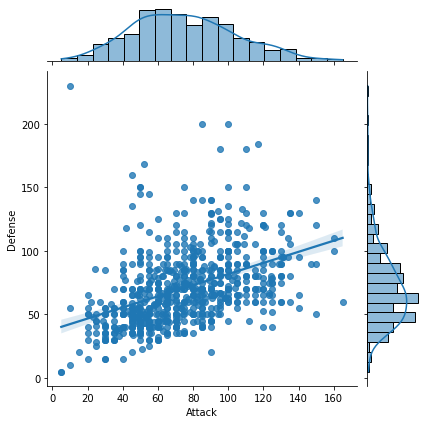

In [22]:
sns.jointplot(x='Attack',y='Defense',data=df,kind='reg')

### filtering a dataframe

In [23]:
df['Type_1'] == 'Grass' # boolean filter

0       True
1       True
2       True
3      False
4      False
       ...  
716    False
717    False
718    False
719    False
720    False
Name: Type_1, Length: 721, dtype: bool

In [24]:
df[ df['Type_1'] == 'Grass' ]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
42,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False,Blue,True,0.500,Grass,NaN,False,0.51,5.4,255,head_legs
43,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False,Blue,True,0.500,Grass,NaN,False,0.79,8.6,120,bipedal_tailless
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,650,Chespin,Grass,NaN,313,56,61,65,48,45,38,6,False,Green,True,0.875,Field,NaN,False,0.41,9.0,45,bipedal_tailed
650,651,Quilladin,Grass,NaN,405,61,78,95,56,58,57,6,False,Green,True,0.875,Field,NaN,False,0.71,29.0,45,bipedal_tailed
651,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False,Green,True,0.875,Field,NaN,False,1.60,90.0,45,bipedal_tailed
671,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False,Brown,True,0.500,Field,NaN,False,0.89,31.0,200,quadruped


In [25]:
grass_df = df[ df['Type_1'] == 'Grass' ].copy()

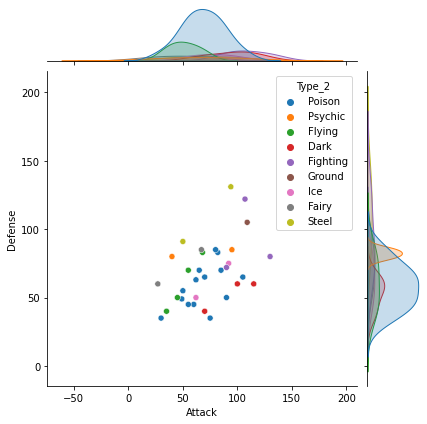

In [26]:
sns.jointplot(x='Attack',y='Defense',data=grass_df, hue='Type_2',)

In [27]:
f1  = df['Type_1'] == 'Grass' # boolean filter
f2  = df['Type_1'] == 'Fire' # boolean filter
df[f1 | f2]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False,Brown,True,0.125,Field,NaN,False,0.61,13.5,220,quadruped
667,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False,Brown,True,0.125,Field,NaN,False,1.50,81.5,65,quadruped
671,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False,Brown,True,0.500,Field,NaN,False,0.89,31.0,200,quadruped
672,673,Gogoat,Grass,NaN,531,123,100,62,97,81,68,6,False,Brown,True,0.500,Field,NaN,False,1.70,91.0,45,quadruped


In [32]:
import plotly.express as px
from plotly.io import renderers 

In [33]:
px.scatter_3d(df[f1 | f2], x='Attack', y='Defense',
              z='Speed', color='Type_2', size='Total',
              title='Pokemon Type Fire and Grass',
              height=600,width=600,hover_name='Name')